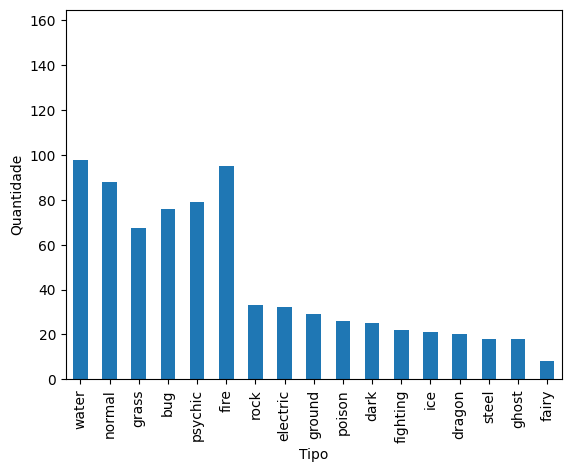

In [1]:
import pandas as pd
import numpy as np
from ipynb.fs.full.extracao import damage_matrix, Types, pokedex_df_filtered

## Classificador de tipos

Agora iremos arrumar um jeito de encontrar um Pokemon com o tipo complementar ao meu Pokemon incial.

In [2]:
pokemon = "Charizard"
pokemon_types = [Types.Fire, Types.Flying]
damage_multipliers = np.empty(18)
damage_multipliers.fill(1)

for cur_type in pokemon_types:
    damage_multipliers_def = damage_matrix[:, cur_type.value]
    for i in range(len(damage_multipliers_def)):
        damage_multipliers[i] = damage_multipliers[i] * damage_multipliers_def[i]


In [3]:
for i in range(len(damage_multipliers)):
    print(f"{Types(i).name} = {damage_multipliers[i]}")

Normal = 1.0
Fire = 0.5
Water = 2.0
Electric = 2.0
Grass = 0.25
Ice = 1.0
Fighting = 0.5
Poison = 1.0
Ground = 0.0
Flying = 1.0
Psychic = 1.0
Bug = 0.25
Rock = 4.0
Ghost = 1.0
Dragon = 1.0
Dark = 1.0
Steel = 0.5
Fairy = 0.5


Sabendo quais as fraquezas e efetividades do meu pokemon, irei buscar:
- 3 pokemons imunes (ou fracos) as fraquezas do meu inicial. Irei escolher as fraquezes que são mais usadas no competitivo.
- 2 pokemons superefetivos contra as fraquezas do meu inicial. Irei escolher as fraquezes que são mais usadas no competitivo.

Irei usar algum critério randomico para escolher tipos diferents para essas duas categorias e gerar mais de uma opção de time.  
Por exemplo, para o Charizard posso escolher 3 Pokemons imunes aos tipos:
- Water
- Ground
- Ice  

ou

- Rock
- Eletric
- Water

## Implementando

In [4]:
four_x_weak = np.argwhere(damage_multipliers == 4).flatten()
two_x_weak = np.argwhere(damage_multipliers == 2).flatten()

In [5]:
weak_types =  np.concatenate([np.random.choice(four_x_weak, size = 1), np.random.choice(two_x_weak, size = 2)])

In [6]:
pokedex_df_filtered_with_predict = pd.read_pickle('./pokedex_df_filtered_with_predict.pkl')

Escolhendo dois pokemons imunes as fraquezas do meu inicial

In [7]:
strong_against_my_weak = np.array([])

for i in weak_types:
    damage_multiplier_def = damage_matrix[:, i]
    immune_to = np.argwhere(damage_multiplier_def == 0.0)
    strong_to = np.argwhere(damage_multiplier_def == 0.5)
    for i in immune_to:
        if len(strong_against_my_weak) == 3:
            break
        strong_against_my_weak = np.append(strong_against_my_weak, i)
    for i in strong_to:
        if len(strong_against_my_weak) == 3:
            break
        strong_against_my_weak = np.append(strong_against_my_weak, i)

In [8]:
for i in strong_against_my_weak:
    print(Types(i))

Types.Normal
Types.Fire
Types.Poison


In [9]:
pokemon_cur_role = pokedex_df_filtered_with_predict[pokedex_df_filtered_with_predict.name == "charizard"].role.values[0]
desired_roles = np.array(['SPAttacker', 'SPAttacker', 'Attacker', 'Attacker', 'Tank' ,'Tank'])
#desired_roles = np.delete(desired_types, np.where(desired_roles == pokemon_cur_type))

In [11]:
 np.delete(desired_roles, np.where(desired_roles == pokemon_cur_type)[0][0])
    

NameError: name 'pokemon_cur_type' is not defined

In [ ]:
np.where(desired_roles == pokemon_cur_type)[0][0]

In [ ]:
desired_roles

In [12]:
pokedex_df_filtered_with_predict

,color,is_legendary,is_mythical,name,shape,image_url,type,base_hp,base_attack,base_defense,base_special_attack,base_special_defense,base_speed,status_mean,type1,type2,role
1,green,False,False,ivysaur,quadruped,https://raw.githubusercontent.com/PokeAPI/spri...,"[grass, poison]",60,62,63,80,80,60,67.500000,grass,poison,Tank
2,green,False,False,venusaur,quadruped,https://raw.githubusercontent.com/PokeAPI/spri...,"[grass, poison]",80,82,83,100,100,80,87.500000,grass,poison,SPAttacker
4,red,False,False,charmeleon,upright,https://raw.githubusercontent.com/PokeAPI/spri...,[fire],58,64,58,80,65,80,67.500000,fire,None,Tank
5,red,False,False,charizard,upright,https://raw.githubusercontent.com/PokeAPI/spri...,"[fire, flying]",78,84,78,109,85,100,89.000000,fire,flying,SPAttacker
7,blue,False,False,wartortle,upright,https://raw.githubusercontent.com/PokeAPI/spri...,[water],59,63,80,65,80,58,67.500000,water,None,Tank
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,green,True,False,virizion,quadruped,https://raw.githubusercontent.com/PokeAPI/spri...,"[grass, fighting]",91,90,72,90,129,108,96.666667,grass,fighting,SPAttacker
634,white,True,False,reshiram,wings,https://raw.githubusercontent.com/PokeAPI/spri...,"[dragon, fire]",100,120,100,150,120,90,113.333333,dragon,fire,SPAttacker
635,black,True,False,zekrom,upright,https://raw.githubusercontent.com/PokeAPI/spri...,"[dragon, electric]",100,150,120,120,100,90,113.333333,dragon,electric,SPAttacker
636,gray,True,False,kyurem,upright,https://raw.githubusercontent.com/PokeAPI/spri...,"[dragon, ice]",125,130,90,130,90,95,110.000000,dragon,ice,SPAttacker
